In [4]:
# UPADTE: We turn off GPU support, although this does not seem to suppress all warnings! 
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

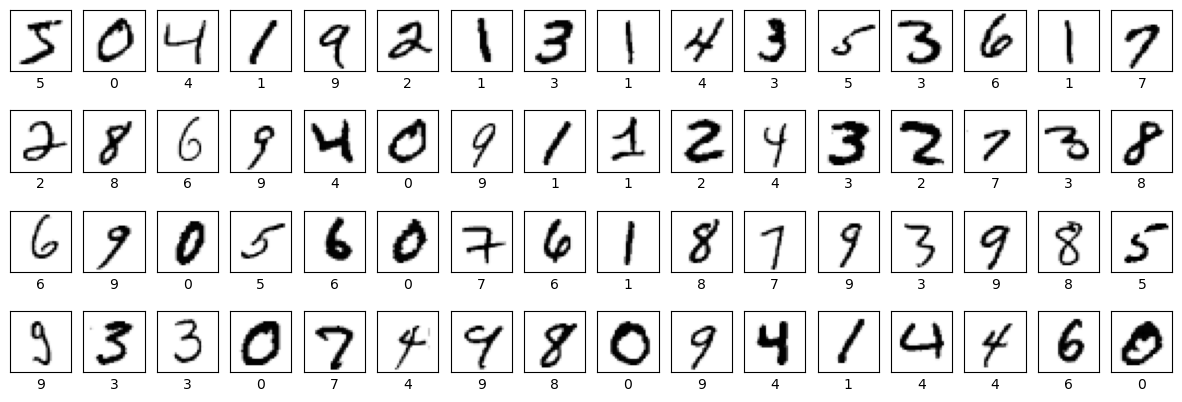

In [9]:
plt.figure(figsize = (15, 5))
for i in range (16*4):
    plt.subplot(4, 16, i + 1)
    plt.imshow(x_train[i], cmap = "Greys")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("{}".format(str(y_train[i])))
plt.show()

In [14]:
# keras is a library within tf 
# clearing tensorflow session incase you run this cell multiple times

tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    # each image is a 28x28 px 2-D Array
    tf.keras.layers.Dense(128, activation = 'relu'), # hidden layer
    # Relu is an activation function where f(x) = max(0, x)
    tf.keras.layers.Dense(10, activation = 'softmax')
    # softmax converts our results into vectors in a probability distribution
    
])

model.compile(optimizer = 'adam',
              # adaptive momentum estimation 
             loss = 'sparse_categorical_crossentropy',
              # produces a matrix with a probable match
             metrics = ['accuracy'])

In [15]:
e = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6506 - accuracy: 0.8625
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3799 - accuracy: 0.9110
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2884 - accuracy: 0.9265
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2447 - accuracy: 0.9362
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2323 - accuracy: 0.9411


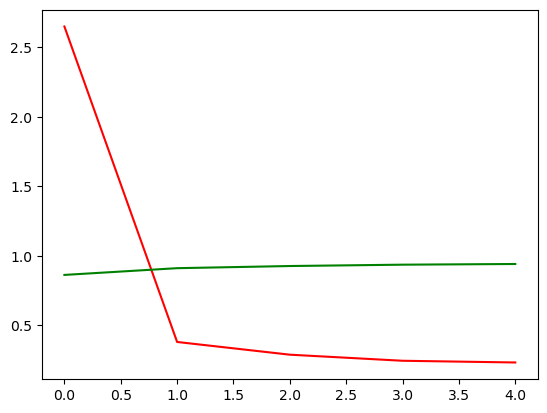

In [19]:
# graph how the model changes 

plt.plot(e.history['loss'], c = 'red')
plt.plot(e.history['accuracy'], c = 'green')
plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2281 - accuracy: 0.9421


[0.22810183465480804, 0.9420999884605408]

1/1 [==============================] - 0s 18ms/step


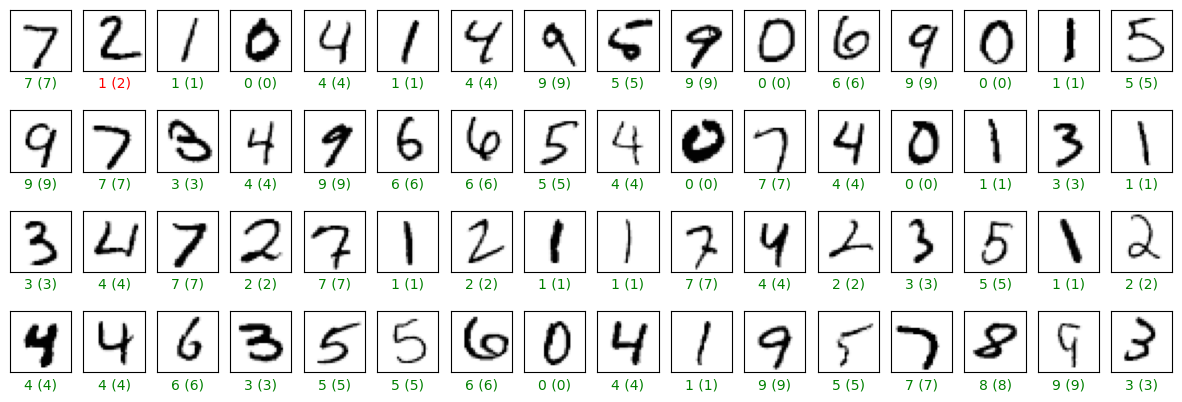

In [22]:
# display prediction and label of a random sample
# if prediction is wrong, red text
# if it is right, green text

plt.figure(figsize=(15, 5))
for i in range(16 * 4):
    plt.subplot(4, 16, i + 1)
    input_data = x_test[i].reshape(1, 28, 28)
    p = model.predict(input_data)
    pred = p.argmax()
    
    plt.imshow(x_test[i].reshape(28, 28), cmap="Greys") 
    plt.xticks([])
    plt.yticks([])
    
    if pred == y_test[i]:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} ({})".format(str(pred), str(y_test[i])), color=color)    
plt.show()
